In [1]:
import numpy as np
import sys
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import dtit.pyLiteMath as lmath

In [2]:
#采样点选择1024个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为1024赫兹（即一秒内有1400个采样点，一样意思的）
x=np.linspace(0,1,1024)  
 
#设置需要采样的信号，频率分量有180，390和600
y=10*np.sin(2*np.pi*180*x) + 3*np.sin(2*np.pi*390*x)+5*np.sin(2*np.pi*600*x)
 
yy=fft(y)      #快速傅里叶变换
yreal = yy.real    # 获取实数部分
yimag = yy.imag    # 获取虚数部分
 
yf=abs(fft(y))    # 取绝对值
yf1=abs(fft(y))/len(x)   #归一化处理
yf2 = yf1[range(int(len(x)/2))] #由于对称性，只取一半区间
 
xf = np.arange(len(y))  # 频率
xf1 = xf
xf2 = xf[range(int(len(x)/2))] #取一半区间

In [3]:
print(yreal[1000:1025])

[0.08828802 0.0809624  0.07396906 0.06730524 0.06096831 0.0549558
 0.04926537 0.04389479 0.038842   0.03410503 0.02968207 0.02557141
 0.02177149 0.01828084 0.01509815 0.01222219 0.00965187 0.00738623
 0.0054244  0.00376564 0.00240933 0.00135495 0.00060211 0.00015051]


In [4]:
print(min(y))

-17.858352746421122


In [5]:
print(yimag[1000:1025])

[1.19689146 1.14547069 1.09425191 1.04322543 0.99238169 0.94171126
 0.8912048  0.8408531  0.79064702 0.74057754 0.6906357  0.64081265
 0.59109959 0.54148781 0.49196863 0.44253347 0.39317377 0.34388103
 0.29464679 0.24546263 0.19632015 0.14721099 0.09812679 0.04905924]


In [13]:
X = xf
Y = np.round(y / 18 * 2048)
fr = Y.astype(np.int16)
fi = np.zeros(1024).astype(np.int16)
#fi = fr
result = lmath.pyFFT1024(fr, fi)
fr = fr.astype(np.int32)
fi = fi.astype(np.int32)
Y1 = np.round(np.sqrt(fr * fr + fi * fi))
print(result)

0


In [7]:
print(fr[1000:1025])

[-1  0  0  0 -1 -1 -1 -1  0 -2 -1 -1 -1 -2 -1  0 -1 -1 -2 -1  0 -2 -2 -2]


In [8]:
print(len(xf))

1024


In [9]:
print(Y[1000:1025])

[  -28.   927.   538.   941. -1736.  -527.   126.   465.  1752. -1103.
  -612.  -714.   -42.  1878.  -133.  -197. -1183.  -654.  1204.   675.
   498. -1076.  -954.    -0.]


In [10]:
print(Y1[1000:1025])

[1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 3. 1. 2. 3. 3. 2.]


In [11]:
print(fi[1000:1025])

[-1 -1 -1 -1 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -2 -1 -2 -2 -2 -1 -2 -2 -2 -1]


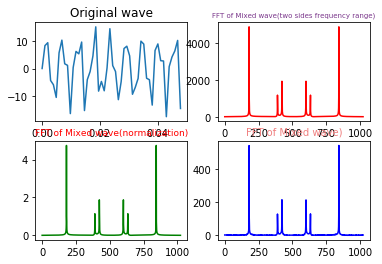

In [12]:
plt.subplot(221)
plt.plot(x[0:50],y[0:50]) 
plt.title('Original wave')
 
plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B') #注意这里的颜色可以查询颜色代码表
 
plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')
 
plt.subplot(224)
#plt.plot(xf2,yf2,'b')
plt.plot(X,Y1,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')
 
plt.show()